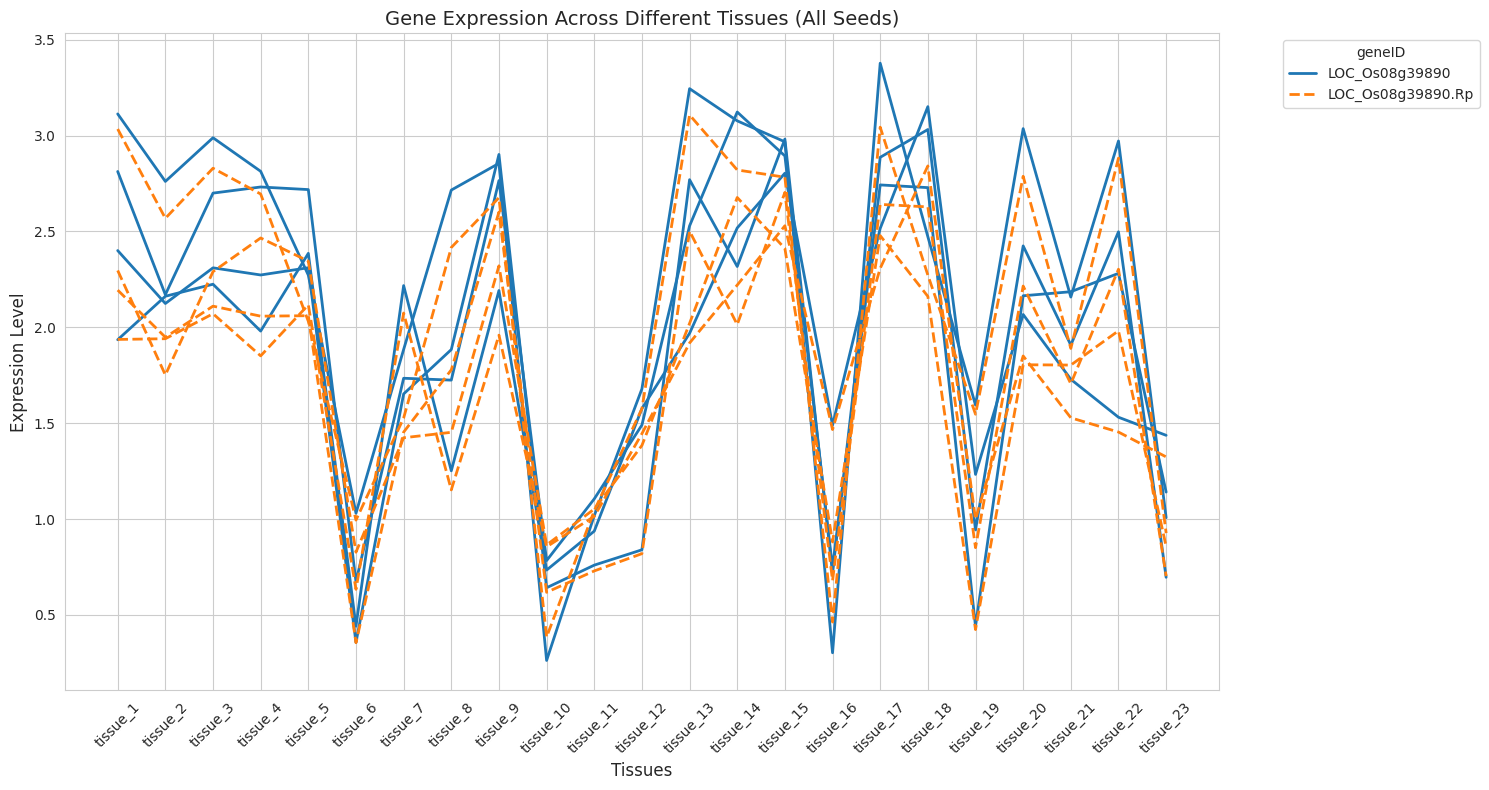

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 读取TSV文件
df = pd.read_csv('merge.tsv', sep='\t')

plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

# 获取所有唯一geneID（.Rp视为新基因）
unique_genes = df['geneID'].unique()
palette = sns.color_palette("tab10", len(unique_genes))
gene_colors = dict(zip(unique_genes, palette))

for gene_id in unique_genes:
    gene_data = df[df['geneID'] == gene_id]
    for idx, row in gene_data.iterrows():
        linestyle = '-' if idx % 2 == 0 else '--'
        # 只为每个geneID的第一条线加label
        label = gene_id if idx == gene_data.index[0] else None
        plt.plot(range(len(row[1:])), row[1:], 
                 label=label,
                 color=gene_colors[gene_id],
                 linestyle=linestyle,
                 linewidth=2)

plt.xticks(range(len(df.columns[1:])), df.columns[1:], rotation=45)
plt.title('Gene Expression Across Different Tissues (All Seeds)', fontsize=14)
plt.xlabel('Tissues', fontsize=12)
plt.ylabel('Expression Level', fontsize=12)
plt.legend(title="geneID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

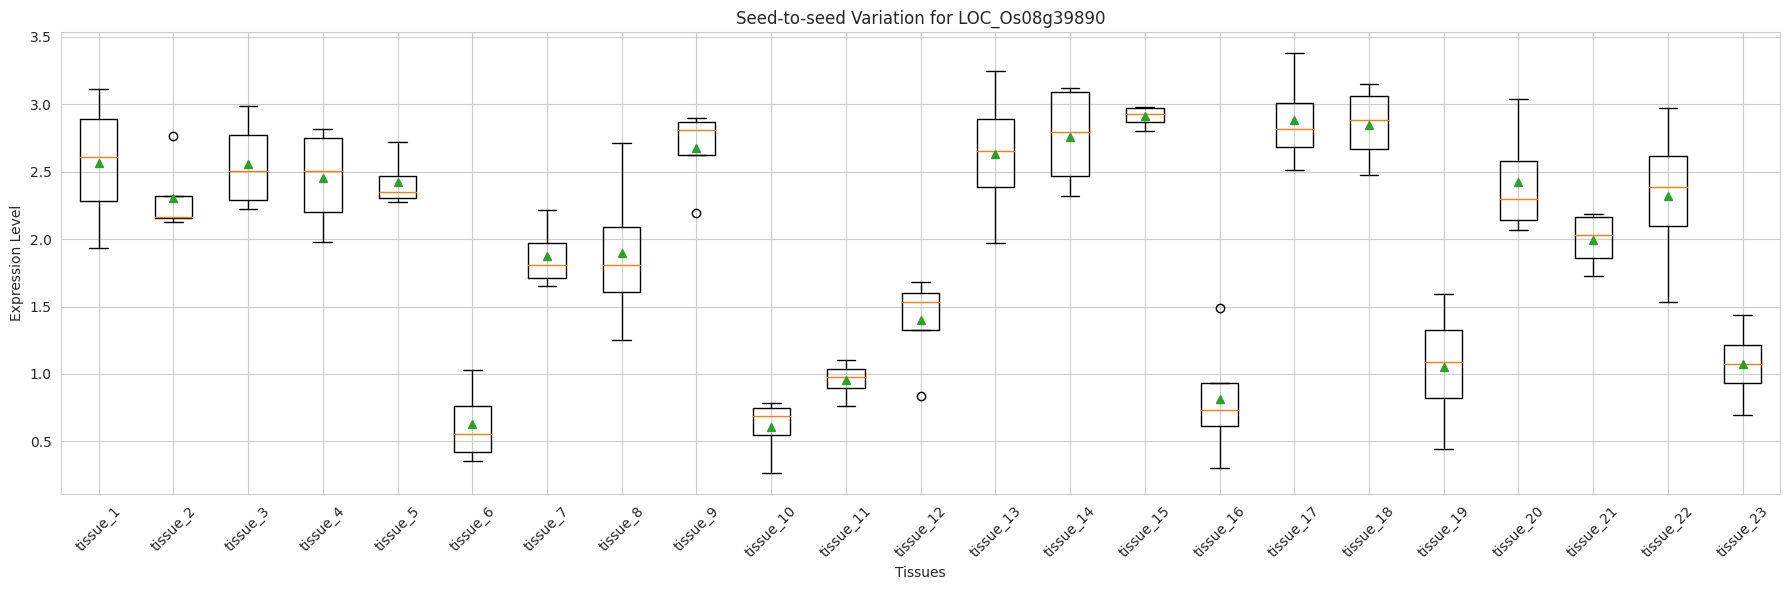

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('merge.tsv', sep='\t')
tissues = df.columns[1:]

# 只画一个geneID的箱线图（如有多个geneID可for循环）
gene_id = df['geneID'].unique()[0]
group = df[df['geneID'] == gene_id]
data = [group[t].astype(float).values for t in tissues]

plt.figure(figsize=(18, 6))
plt.boxplot(data, labels=tissues, showmeans=True)
plt.ylabel('Expression Level')
plt.xlabel('Tissues')
plt.title(f'Seed-to-seed Variation for {gene_id}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

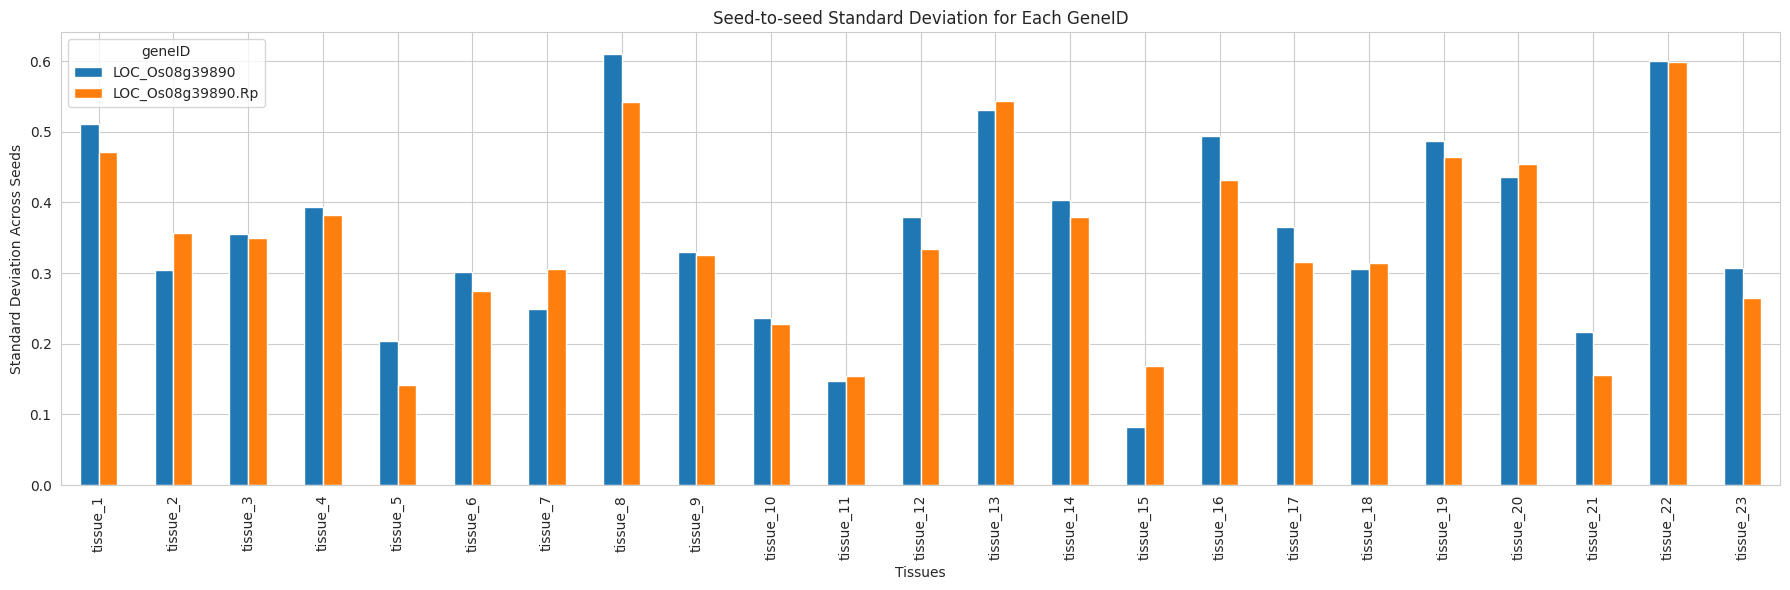

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('merge.tsv', sep='\t')

# 以geneID分组
gene_ids = df['geneID'].unique()
tissues = df.columns[1:]

# 计算每个geneID每个tissue的标准差
std_df = pd.DataFrame(columns=['geneID'] + list(tissues))
for gene_id in set([g.split('.')[0] for g in gene_ids]):
    # 找到该geneID的所有seed（包括.Rp和不带.Rp的分开算）
    for suffix in ['', '.Rp']:
        gid = gene_id + suffix if suffix else gene_id
        group = df[df['geneID'] == gid]
        if not group.empty:
            stds = group[tissues].astype(float).std(axis=0)
            std_df.loc[len(std_df)] = [gid] + list(stds.values)

# 画图
std_df.set_index('geneID').T.plot(kind='bar', figsize=(18, 6))
plt.ylabel('Standard Deviation Across Seeds')
plt.xlabel('Tissues')
plt.title('Seed-to-seed Standard Deviation for Each GeneID')
plt.legend(title='geneID')
plt.tight_layout()
plt.show()